<a href="https://colab.research.google.com/github/jimbv/modelos_predictivos/blob/main/Proyecto_ME_Modelos_Predictivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Importación de las librerias 
import numpy as np
import pandas as pd
# ---------------------
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [50]:
# Cargamos el DataSet
clientes_P = pd.read_csv("Clientes.csv")

# **EDA - ANALISIS EXPLORATORIO DE LOS DATOS**

In [51]:
# Vemos la cabecera del DataSet
clientes_P.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
# Visualizamos la cantidad de filas y columnas que posee 
clientes_P.shape

(10000, 14)

In [53]:
clientes_P.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [54]:
# Eliminamos las variables que no consideramos utiles para el analisis predictivo. 
clientes_P = clientes_P.drop(columns = ['Surname','CustomerId','RowNumber'],axis=1)

In [44]:
clientes_P.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Primera aproximación a la descripción de los datos del dataset

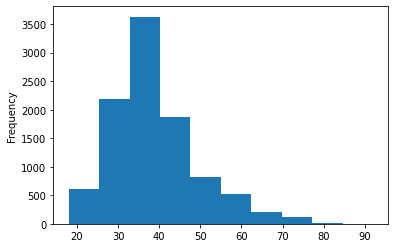

In [41]:
clientes_A = clientes_P["Age"]
clientes_A.plot.hist() #histograma de la variable Age

In [43]:

from scipy.stats import shapiro
shapiro(clientes_A)

ShapiroResult(statistic=0.9441393613815308, pvalue=0.0)

La Variable edad, es cuantitativa discreta con una distribución sesgada a la derecha.

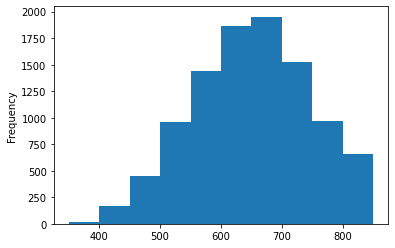

In [13]:
clientes_CS = clientes_P["CreditScore"]
clientes_CS.plot.hist() #histograma de la variable CreditScore

In [14]:

from scipy.stats import shapiro
shapiro(clientes_CS)


ShapiroResult(statistic=0.9939236044883728, pvalue=3.49348422601834e-20)

In [15]:
clientes_CS.mean()

650.5288

La Variable del Scoring bancario es cuantitativa continua con distribución normal como lo indica el p-valor > 1 y media en 650.5288.

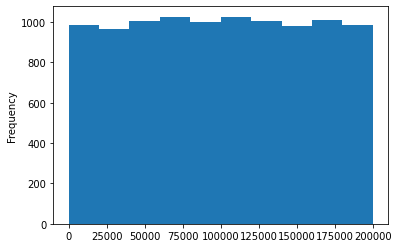

In [16]:
clientes_ES = clientes_P["EstimatedSalary"]
clientes_ES.plot.hist() #histograma de la variable CreditScore

In [17]:
shapiro(clientes_ES)


ShapiroResult(statistic=0.9566369652748108, pvalue=0.0)

La variable salario estimado es cuantitativa continua con una distribución no normal.

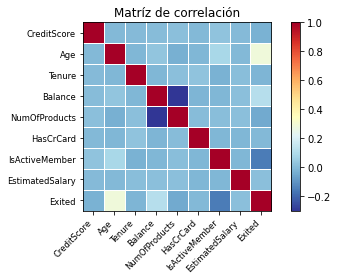

In [40]:
matrix = clientes_P.corr() 
  
import statsmodels.graphics.api as smg


#smg.plot_corr(matrix, xnames=['Puntaje','País','Género','Edad','Tenure','Balance','Nro. de productos','Tiene tarjeta de credito','Miembro activo'],title='Matríz de correlación')
smg.plot_corr(matrix,xnames=matrix.columns,title='Matríz de correlación')

plt.show()

Vemos que hay poca relación entre las distintas variables salvo entre la edad y la salida del sistema bancario. 

In [39]:
matrix.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# MODELADO

In [ ]:
# Convertimos en numeros las variables categoricas 
# Previamente observamos las categorias que tienen
print(clientes_P['Geography'].unique())
print(clientes_P['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [ ]:
clientes_P = pd.get_dummies(clientes_P,drop_first=True)

In [ ]:
clientes_P

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
# Balanceamos los datos

In [ ]:
# Recordamos el analisis previo en el EDA
clientes_P["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


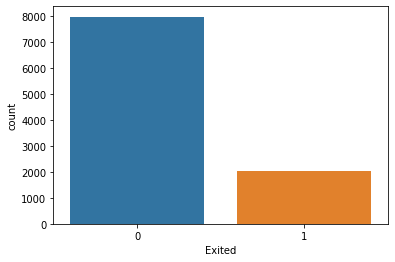

In [45]:
sns.countplot(clientes_P["Exited"])

In [ ]:
# Balanceamos los datos luego de ver que si no lo hacemos obtenemos un mal resultado en las metricas 

from imblearn.over_sampling import SMOTE

In [ ]:
X = clientes_P.drop("Exited",axis=1)
y = clientes_P["Exited"]

In [ ]:
X_bal, y_bal = SMOTE().fit_resample(X,y)

In [ ]:
y_bal.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.20, random_state=42)

In [ ]:
# Queremos Predecir el abandono, la variable "Exited" en este caso 
clientes_P

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Ahora si visualizamos , observamos que todas tienen la misma escala 

X_train

array([[-2.00466392, -0.79820829,  0.43788733, ..., -0.57432905,
        -0.46100432, -0.84469944],
       [ 1.10214632,  0.10844942, -1.4047222 , ..., -0.57432905,
        -0.46100432,  1.18385304],
       [-0.12740402,  0.81362764, -1.03620029, ..., -0.57432905,
        -0.46100432, -0.84469944],
       ...,
       [ 0.20193982,  0.20918917,  1.17493114, ..., -0.57432905,
        -0.46100432,  1.18385304],
       [-0.2371853 , -0.49598905, -1.03620029, ..., -0.57432905,
         2.16917707, -0.84469944],
       [ 0.53128366,  1.01510713, -1.4047222 , ...,  1.74116213,
        -0.46100432,  1.18385304]])

In [ ]:
X_test

array([[-1.24717308, -1.20116727,  0.06936543, ..., -0.57432905,
        -0.46100432, -0.84469944],
       [-0.46772599,  0.00770967, -0.29915648, ...,  1.74116213,
        -0.46100432, -0.84469944],
       [ 0.34465549, -0.99968778,  1.54345305, ..., -0.57432905,
         2.16917707, -0.84469944],
       ...,
       [ 0.10313667, -0.29450956,  0.43788733, ..., -0.57432905,
        -0.46100432, -0.84469944],
       [ 1.11312445,  1.11584688,  0.43788733, ...,  1.74116213,
        -0.46100432, -0.84469944],
       [-0.40185722,  0.81362764, -1.03620029, ...,  1.74116213,
        -0.46100432, -0.84469944]])

In [ ]:
y_test

6126     0
7093     1
1659     0
15727    1
9682     0
        ..
11031    1
9747     1
5912     0
2879     1
14259    1
Name: Exited, Length: 3186, dtype: int64

In [ ]:
y_train

13555    1
1665     0
14878    1
7471     0
2582     0
        ..
13418    1
5390     1
860      1
15795    1
7270     0
Name: Exited, Length: 12740, dtype: int64

In [ ]:
# Modelo de Regresión Logistica  
from sklearn.linear_model import LogisticRegression

In [ ]:
regression = LogisticRegression()
regression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.7831136220966729

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision_score(y_test,y_pred)

0.7703889585947302

In [ ]:
recall_score(y_test,y_pred)

0.7907276239536382

In [ ]:
f1_score(y_test,y_pred)

0.7804258023514459

In [ ]:
# Podemos observer la matriz de confusión 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1267  366]
 [ 325 1228]]


In [ ]:
# Probamos otros modelos 
# Como ya tenemos armado el conjunto de entrenamiento, podemos aplicar directamente la predicción

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_2 = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_2)

0.8427495291902072

In [ ]:
precision_score(y_test,y_pred_2)

0.826302729528536

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_2)
print(cm)

[[1353  280]
 [ 221 1332]]


In [ ]:
# KNeighbors Classifier 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_3 = knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_3)

0.8232893910860013

In [ ]:
precision_score(y_test,y_pred_3)

0.8007290400972054

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_3)
print(cm)

[[1305  328]
 [ 235 1318]]


In [ ]:
# Arboles de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt= DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_4=dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_4)

0.788135593220339

In [ ]:
precision_score(y_test,y_pred_4)

0.7641395908543923

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_4)
print(cm)

[[1241  392]
 [ 283 1270]]


In [ ]:
# Bosques aleatorios

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_5 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_5)

0.8640929064657878

In [ ]:
precision_score(y_test,y_pred_5)

0.8517587939698492

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_5)
print(cm)

[[1397  236]
 [ 197 1356]]


Accuracy del modelo de LogisticRegression :    0.784
Recall del modelo de LogisticRegression :      0.789
Accuracy del modelo de LogisticRegression :    0.773
Recall del modelo de LogisticRegression :      0.789


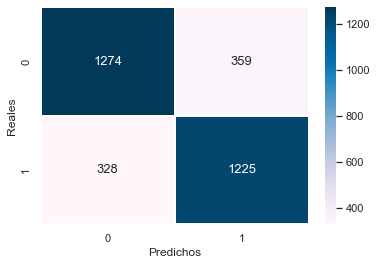

In [ ]:
# Comparamos graficamente los resultados de los modelos , e imprimimos las metricas 
model_name = regression.__class__.__name__

y_true = y_test
y_predicted = y_pred

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de ' + model_name + ' :   ', accuracy_score(y_test, y_pred).round(3))
print('Recall del modelo de ' + model_name + ' :     ', recall_score(y_test, y_pred).round(3))
print('Accuracy del modelo de ' + model_name + ' :   ', precision_score(y_test, y_pred).round(3))
print('Recall del modelo de ' + model_name + ' :     ', recall_score(y_test, y_pred).round(3))

Accuracy del modelo de SVC :    0.837
Recall del modelo de SVC :      0.833
Accuracy del modelo de SVC :    0.833
Recall del modelo de SVC :      0.833


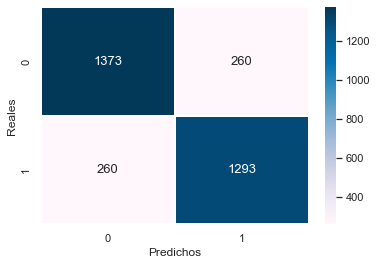

In [ ]:
model_name = svm.__class__.__name__

y_true = y_test
y_predicted = y_pred_2

sns.heatmap(confusion_matrix(y_test, y_pred_2), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de ' + model_name + ' :   ', accuracy_score(y_test, y_pred_2).round(3))
print('Recall del modelo de ' + model_name + ' :     ', recall_score(y_test, y_pred_2).round(3))
print('Accuracy del modelo de ' + model_name + ' :   ', precision_score(y_test, y_pred_2).round(3))
print('Recall del modelo de ' + model_name + ' :     ', recall_score(y_test, y_pred_2).round(3))

Accuracy del modelo de KNeighborsClassifier :    0.819
Recall del modelo de KNeighborsClassifier :      0.84
Accuracy del modelo de KNeighborsClassifier :    0.799
Recall del modelo de KNeighborsClassifier :      0.84


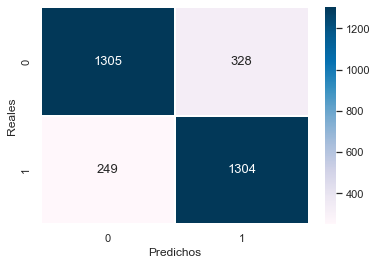

In [ ]:
model_name = knn.__class__.__name__

y_true = y_test
y_predicted = y_pred_3

sns.heatmap(confusion_matrix(y_test, y_pred_3), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de ' + model_name + ' :   ', accuracy_score(y_test, y_pred_3).round(3))
print('Recall del modelo de ' + model_name + ' :     ', recall_score(y_test, y_pred_3).round(3))
print('Accuracy del modelo de ' + model_name + ' :   ', precision_score(y_test, y_pred_3).round(3))
print('Recall del modelo de ' + model_name + ' :     ', recall_score(y_test, y_pred_3).round(3))

Accuracy del modelo de DecisionTreeClassifier :    0.788
Recall del modelo de DecisionTreeClassifier :      0.818
Accuracy del modelo de DecisionTreeClassifier :    0.764
Recall del modelo de DecisionTreeClassifier :      0.818


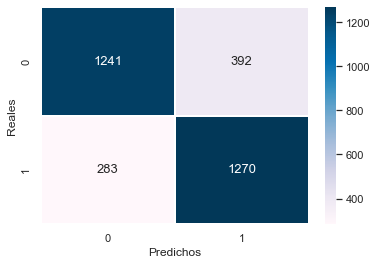

In [ ]:
model_name = dt.__class__.__name__

y_true = y_test
y_predicted = y_pred_4

sns.heatmap(confusion_matrix(y_test, y_pred_4), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de ' + model_name + ' :   ', accuracy_score(y_test, y_pred_4).round(3))
print('Recall del modelo de ' + model_name + ' :     ', recall_score(y_test, y_pred_4).round(3))
print('Accuracy del modelo de ' + model_name + ' :   ', precision_score(y_test, y_pred_4).round(3))
print('Recall del modelo de ' + model_name + ' :     ', recall_score(y_test, y_pred_4).round(3))

Accuracy del modelo de RandomForestClassifier :    0.864
Recall del modelo de RandomForestClassifier :      0.873
Accuracy del modelo de RandomForestClassifier :    0.852
Recall del modelo de RandomForestClassifier :      0.873


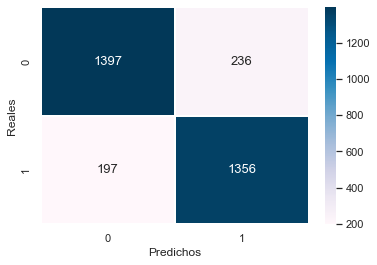

In [ ]:
model_name = rf.__class__.__name__

y_true = y_test
y_predicted = y_pred_5

sns.heatmap(confusion_matrix(y_test, y_pred_5), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de ' + model_name + ' :   ', accuracy_score(y_test, y_pred_5).round(3))
print('Recall del modelo de ' + model_name + ' :     ', recall_score(y_test, y_pred_5).round(3))
print('Accuracy del modelo de ' + model_name + ' :   ', precision_score(y_test, y_pred_5).round(3))
print('Recall del modelo de ' + model_name + ' :     ', recall_score(y_test, y_pred_5).round(3))